<a href="https://colab.research.google.com/github/Rupasri20055/K-Nearest-Neighbors-KNN-Classification/blob/main/K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


**Load and inspect dataset**

In [35]:
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier inspection
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


**Train-Test split**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Normalize features**

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Train KNN Classifier with k=5**

In [39]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train);


 Predict and evaluate

In [40]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Experiment with different K values**

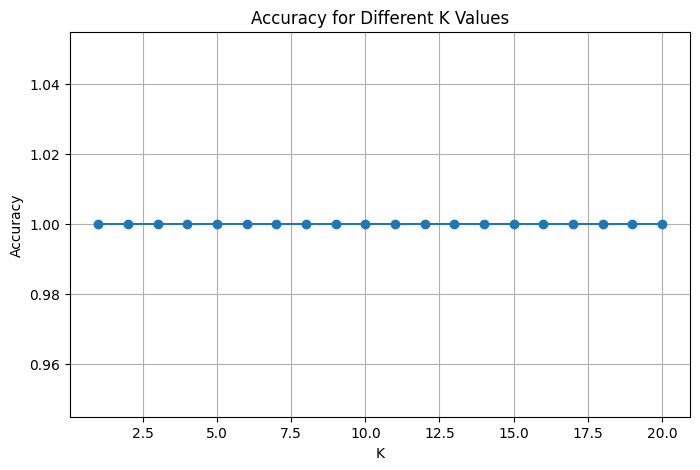

In [41]:
accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Plot accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.title("Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


**Visualize decision boundaries (for 2 features)**

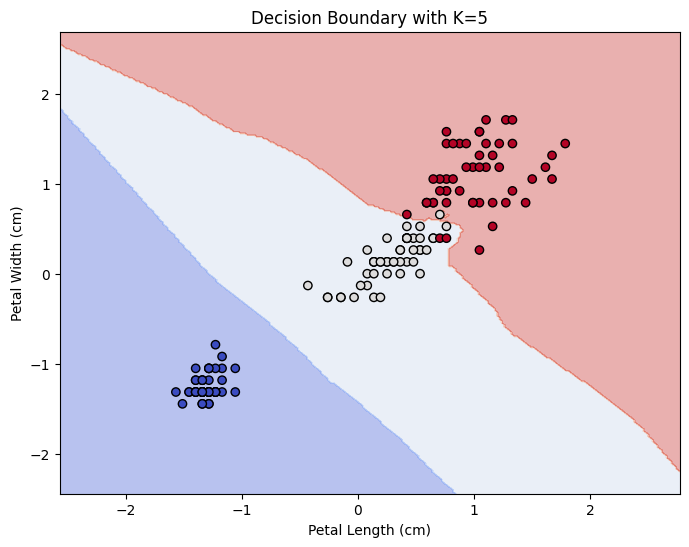

In [42]:
# Using only petal length & petal width for 2D visualization
X_vis = df[['petal length (cm)', 'petal width (cm)']].values
y_vis = df['target'].values

# Normalize
X_vis = scaler.fit_transform(X_vis)

# Split again
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Train KNN
model_v = KNeighborsClassifier(n_neighbors=5)
model_v.fit(X_train_v, y_train_v)

# Create meshgrid for decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_v.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary with K=5')
plt.show()
